In [154]:
13.73260799728012
13.73260799 #= revolutions per 24 hours

num = 13.73260799

rev = (num/(24*60*60)) #= revolutions per second
#print(rev)

In [180]:
# semimajor axis

import math

# seconds it takes for 1 revolution

seconds = (24*60*60)/num
seconds

6291.594434423231

In [156]:
k = 1.38 * 10**-23

semi = (((seconds**2)*((5.9742 * 10**24)*(k**2)))/(4*(math.pi**2)))
print(semi)

1.1407740482893288e-15


In [157]:
#mean orbital velocity

vel = semi/rev
print(vel)

7.1772876531515996e-12


In [158]:
#mass
#semimajor axis
#mean orbital velocity


In [159]:
#from math import sqrt, cos, sin, pi
#from turtle import Screen, Turtle

#class Star(Turtle):
    #def __init__(self, colour):
        #super().__init__(shape='circle')

        #self.color(colour)

#class Planet(Turtle):
    #def __init__(self, colour, a, b, period):
        #super().__init__(shape='circle')

        #self.color(colour)
        #self.a = a
        #self.b = b
        #self.period = period

        #self.t = 0
        #self.speed('fastest')
        #self.shapesize(0.25)

        #self.penup()
        #self.orbit()
        #self.pendown()

    #def orbit(self):
        #c = sqrt(self.a ** 2 - self.b ** 2)
        #angle = self.t / (2 * pi)

        #self.goto(self.a * cos(angle) + c, self.b * sin(angle))

        #self.t += 1
        #screen.ontimer(self.orbit, self.period)

#screen = Screen()

#sun = Star('yellow')
#mercury = Planet('blue', 50, 49.9, 88)
#earth = Planet('red', 75, 74.9, 365)

#screen.mainloop()

In [160]:
import math
from turtle import *

G = 6.67428e-11


AU = (149.6e6 * 1000)   
SCALE = 250 / AU

class Body(Turtle):

    name = 'Body'
    mass = None
    vx = vy = 0.0
    px = py = 0.0
    
    def Orbit(self, sat):
        if self is sat:
            raise ValueError("Orbit of object %r to itself requested"
                             % self.name)

        sx, sy = self.px, self.py
        ox, oy = sat.px, sat.py
        dx = (ox-sx)
        dy = (oy-sy)
        d = math.sqrt(dx**2 + dy**2)

        if d == 0:
            raise ValueError("Collision between objects %r and %r"
                             % (self.name, sat.name))

        f = G * self.mass * sat.mass / (d**2)

        theta = math.atan2(dy, dx)
        fx = math.cos(theta) * f
        fy = math.sin(theta) * f
        return fx, fy

def update_info(step, satellites):
   
    print('Step #{}'.format(step))
    for body in satellites:
        s = '{:<8}  Pos.={:>6.2f} {:>6.2f} Vel.={:>10.3f} {:>10.3f}'.format(
            body.name, body.px/AU, body.py/AU, body.vx, body.vy)
        print(s)
    print()

def loop(satellites):
 
    timestep = 24*3600  # One day
    
    for body in satellites:
        body.penup()
        body.hideturtle()

    step = 1
    while True:
        update_info(step, satellites)
        step += 1

        force = {}
        for body in satellites:

            total_fx = total_fy = 0.0
            for sat in satellites:
               
                if body is sat:
                    continue
                fx, fy = body.Orbit(sat)
                total_fx += fx
                total_fy += fy

            force[body] = (total_fx, total_fy)

        for body in satellites:
            fx, fy = force[body]
            body.vx += fx / body.mass * timestep
            body.vy += fy / body.mass * timestep

            body.px += body.vx * timestep
            body.py += body.vy * timestep
            body.goto(body.px*SCALE, body.py*SCALE)
            body.dot(3)


def main():
    earth = Body()
    earth.name = 'Earth'
    earth.mass = 5.9742 * 10**24
    earth.pencolor('Blue')

    idk = Body()
    idk.name = 'idk'
    idk.mass = 1
    idk.px = 1.1407740482893288e-15*AU
    idk.vy =  7.1772876531515996e-12
    idk.pencolor('Red')



    loop([earth, idk])

if __name__ == '__main__':
    main()

Step #1
Earth     Pos.=  0.00   0.00 Vel.=     0.000      0.000
idk       Pos.=  0.00   0.00 Vel.=     0.000      0.000



Terminator: 

In [161]:
from pyorbital import tlefile

tle = tlefile.read('ATLAS CENTAUR 2', '/Users/ambereenrazak/Documents/ap17026/Lumi_TLE.txt')
tle.inclination

30.3555

In [162]:
from pyorbital.orbital import Orbital
from datetime import datetime

In [163]:
orb = Orbital('Suomi NPP')    #Suomi NPP / ATLAS CENTAUR 2

In [164]:
now = datetime.utcnow()
pos = orb.get_position(now)
print(pos)

(array([ 0.5974207 , -0.26393999, -0.92323975]), array([-0.05774944,  0.00541978, -0.03893957]))


In [165]:
latlonalt = orb.get_lonlatalt(now)
print(latlonalt)

(-118.42111832211081, -54.883204854829465, 849.20607389636234)


In [166]:
import matplotlib.pyplot as plt
import numpy as np

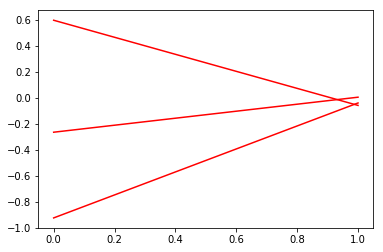

In [167]:
plt.figure()
plt.plot(pos,'r-')
plt.show()

In [168]:
from mpl_toolkits import mplot3d

In [169]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

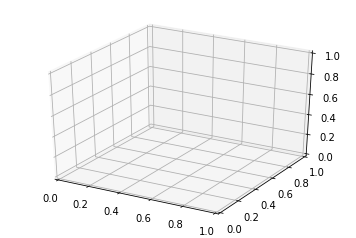

In [170]:
fig = plt.figure()
#plt.plot(pos,0,'r-')
ax = plt.axes(projection='3d')

In [176]:
#mplot3d(pos)    #, animate = True)
#plot(pos, title = '#1', animate = True)

In [141]:
from numpy import radians
from scipy.constants import kilo

import matplotlib.animation as animation

from orbital import earth, KeplerianElements, Maneuver, plot, plot3d 

In [142]:
from orbital import earth_sidereal_day

In [143]:
molniya = KeplerianElements.with_period(
    earth_sidereal_day / 2, e=0.741, i=radians(63.4), arg_pe=radians(270),
    body=earth)

# Simple circular orbit
orbit = KeplerianElements.with_altitude(1000 * kilo, body=earth)

In [145]:
#plot3d(molniya, animate=True)
#Aniamate[plot3d(molniya)]
#animantion.FuncAnimation[plot3d(molniya),{x, -2, 2}, {y, -2, 2}, {n, 1, 4}]

In [ ]:
FuncAnimation(fig, animate, steps, )

In [178]:
from numpy import radians
from scipy.constants import kilo

from orbital import earth, KeplerianElements, plot

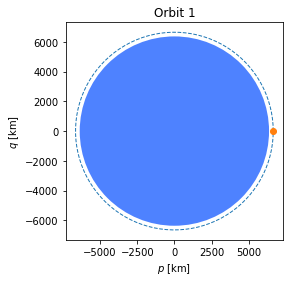

In [179]:
orbit1 = KeplerianElements.with_period(90 * 60, body=satellite)
plot(orbit1, title='Orbit 1')